In [1]:
#Formula 1 Modeling By Raj Vemuri, Adarsh Singh, Bowen Li
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
##read in csvs
constructors = pd.read_csv("constructors.csv")
constructor_standings = pd.read_csv("constructor_standings.csv")
constructor_results = pd.read_csv("constructor_results.csv")
constructors = constructors.drop(columns=['url']) #drop url column
constructors

,constructorId,constructorRef,name,nationality
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


In [3]:
#Merge constructor table with constructor standings
constructor_master = constructors.merge(constructor_standings,on='constructorId')
#constructor_master = constructor_master.merge(constructor_results,on=['constructorId','raceId'])
constructor_master

,constructorId,constructorRef,name,nationality,constructorStandingsId,raceId,points,position,positionText,wins
0,1,mclaren,McLaren,British,1,18,14.0,1,1,1
1,1,mclaren,McLaren,British,7,19,24.0,1,1,1
2,1,mclaren,McLaren,British,18,20,28.0,3,3,1
3,1,mclaren,McLaren,British,29,21,34.0,3,3,1
4,1,mclaren,McLaren,British,40,22,42.0,3,3,1
...,...,...,...,...,...,...,...,...,...,...
12581,214,alpine,Alpine F1 Team,French,27740,1056,17.0,7,7,0
12582,214,alpine,Alpine F1 Team,French,27750,1057,25.0,7,7,0
12583,214,alpine,Alpine F1 Team,French,27760,1059,29.0,7,7,0
12584,214,alpine,Alpine F1 Team,French,27770,1058,31.0,7,7,0


In [4]:
##Create DataFrame consisting of races, driver standings, drivers and qualifying results
races = pd.read_csv("races.csv").drop(columns=['url'])
drivers = pd.read_csv("drivers.csv").drop(columns=['url'])
driver_standings = pd.read_csv("driver_standings.csv")
##merge races with driver standings and drivers
races_standings = races.merge(driver_standings,on=['raceId'])
races_standings = races_standings.merge(drivers,on=['driverId'])
#drop non-needed columns
races_standings = races_standings.drop(columns=['positionText','driverRef','name'])

#races_standings

In [5]:
#merge each drivers qualifying results on the race and driver id
qualifying = pd.read_csv('qualifying.csv')
qualifying = qualifying.rename(columns={'position':'qualifier_position'})
races_standings = races_standings.merge(qualifying,on=['raceId','driverId'])
races_standings2 = races_standings.loc[races_standings.raceId==1000]
races_standings2

,raceId,year,round,circuitId,date,time,driverStandingsId,driverId,points,position,wins,number_x,code,forename,surname,dob,nationality,qualifyId,constructorId,number_y,qualifier_position,q1,q2,q3
250,1000,2018,12,11,2018-07-29,13:10:00,68871,8,146.0,3,0,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,7760,6,7,3,1:17.526,1:32.762,1:36.186
606,1000,2018,12,11,2018-07-29,13:10:00,68869,20,189.0,2,4,5,VET,Sebastian,Vettel,1987-07-03,German,7761,6,5,4,1:16.666,1:28.636,1:36.210
1845,1000,2018,12,11,2018-07-29,13:10:00,68873,4,44.0,9,0,14,ALO,Fernando,Alonso,1981-07-29,Spanish,7768,1,14,11,1:18.208,1:35.214,NaN
3246,1000,2018,12,11,2018-07-29,13:10:00,68870,1,213.0,1,5,44,HAM,Lewis,Hamilton,1985-01-07,British,7778,131,44,1,1:17.419,1:31.242,1:35.658
3483,1000,2018,12,11,2018-07-29,13:10:00,68884,154,21.0,14,0,8,GRO,Romain,Grosjean,1986-04-17,French,7767,210,8,10,1:17.901,1:33.650,1:40.593
6102,1000,2018,12,11,2018-07-29,13:10:00,68875,807,52.0,7,0,27,HUL,Nico,Hülkenberg,1987-08-19,German,7770,4,27,13,1:17.905,1:36.506,NaN
6590,1000,2018,12,11,2018-07-29,13:10:00,68879,815,30.0,10,0,11,PER,Sergio,Pérez,1990-01-26,Mexican,7776,10,11,19,1:19.200,NaN,NaN
6784,1000,2018,12,11,2018-07-29,13:10:00,68872,817,118.0,5,2,3,RIC,Daniel,Ricciardo,1989-07-01,Australian,7769,9,3,12,1:18.540,1:36.442,NaN
7106,1000,2018,12,11,2018-07-29,13:10:00,68876,822,132.0,4,0,77,BOT,Valtteri,Bottas,1989-08-28,Finnish,7779,131,77,2,1:17.123,1:32.081,1:35.918
7322,1000,2018,12,11,2018-07-29,13:10:00,68885,825,45.0,8,0,20,MAG,Kevin,Magnussen,1992-10-05,Danish,7766,210,20,9,1:18.314,1:32.968,1:39.858


In [6]:
#Read results.csv
results = pd.read_csv('results.csv')


In [7]:
#only show top 10 (podium) of each race since 2010
#add in fastestLapTime, fastestLapSpeed, statusId of each driver in each race
races_standings = races_standings.sort_values(by=['raceId','position'])
races_standings = races_standings.loc[races_standings.year>=2010]
races_standings = races_standings.merge(results[['raceId','driverId','fastestLapTime','fastestLapSpeed','statusId','grid']],on=['raceId','driverId'])
races_standings = races_standings.drop(columns=['code','number_y','dob'])
races_standings_top10 = races_standings.loc[races_standings.position<=10]
races_standings = races_standings.replace(r'\N','0') 
#races_standings.loc[races_standings.raceId==1000]
races_standings[races_standings.raceId==950]

,raceId,year,round,circuitId,date,time,driverStandingsId,driverId,points,position,wins,number_x,forename,surname,nationality,qualifyId,constructorId,qualifier_position,q1,q2,q3,fastestLapTime,fastestLapSpeed,statusId,grid
2621,950,2016,3,17,2016-04-17,06:00:00,67594,3,75.0,1,3,6,Nico,Rosberg,German,6727,131,1,1:37.669,1:36.240,1:35.402,1:40.418,195.419,1,1
2622,950,2016,3,17,2016-04-17,06:00:00,67595,1,39.0,2,0,44,Lewis,Hamilton,British,6748,131,22,0,0,0,1:40.662,194.945,1,22
2623,950,2016,3,17,2016-04-17,06:00:00,67597,817,36.0,3,0,3,Daniel,Ricciardo,Australian,6728,9,2,1:37.672,1:36.815,1:35.917,1:41.015,194.264,1,2
2624,950,2016,3,17,2016-04-17,06:00:00,67596,20,33.0,4,0,5,Sebastian,Vettel,German,6730,6,4,1:37.001,1:36.183,1:36.246,1:40.610,195.046,1,4
2625,950,2016,3,17,2016-04-17,06:00:00,67611,8,28.0,5,0,7,Kimi,Räikkönen,Finnish,6729,6,3,1:37.347,1:36.118,1:35.972,1:40.593,195.079,1,3
2626,950,2016,3,17,2016-04-17,06:00:00,67598,13,22.0,6,0,19,Felipe,Massa,Brazilian,6737,3,11,1:38.016,1:37.347,0,1:41.815,192.737,1,10
2627,950,2016,3,17,2016-04-17,06:00:00,67615,826,21.0,7,0,26,Daniil,Kvyat,Russian,6732,9,6,1:37.719,1:36.948,1:36.399,1:41.546,193.248,1,6
2628,950,2016,3,17,2016-04-17,06:00:00,67599,154,18.0,8,0,8,Romain,Grosjean,French,6740,210,14,1:38.425,1:39.830,0,1:39.923,196.387,11,14
2629,950,2016,3,17,2016-04-17,06:00:00,67603,830,13.0,9,0,33,Max,Verstappen,Dutch,6735,5,9,1:38.181,1:37.265,1:37.194,1:40.399,195.456,1,9
2630,950,2016,3,17,2016-04-17,06:00:00,67601,822,7.0,10,0,77,Valtteri,Bottas,Finnish,6731,3,5,1:37.537,1:36.831,1:36.296,1:41.558,193.225,1,5


In [8]:
lap_times = pd.read_csv('lap_times.csv')
lap_times = lap_times.drop(columns=['lap','position','time'])
lap_times = lap_times.groupby(['raceId','driverId']).mean().reset_index()
lap_times = lap_times.rename(columns={"milliseconds": "avgLapTimeMS"})
lap_times2 = lap_times[lap_times.raceId==1035]
#lap_times2 

In [9]:
#Merge average laptime with main table
races_standings = races_standings.merge(lap_times[['raceId','driverId','avgLapTimeMS']],on=['raceId','driverId'])
#races_standings[races_standings.raceId==1035]


In [10]:
pit_stops = pd.read_csv('pit_stops.csv')
pit_stops_avg_time = pit_stops.drop(columns=['lap','time','duration','stop'])
pit_stops_avg_time = pit_stops_avg_time.groupby(['raceId','driverId']).mean().reset_index()
#pit_stops_avg_time

In [11]:
pit_stops_total = pit_stops.drop(columns=['lap','time','duration','milliseconds'])
pit_stops_total = pit_stops_total.groupby(['raceId','driverId']).max().reset_index()
#pit_stops_total[pit_stops_total.raceId==841]

In [12]:
pit_stops = pit_stops_avg_time.merge(pit_stops_total[['raceId','driverId','stop']], on=['raceId','driverId'])
pit_stops = pit_stops.rename(columns={"milliseconds":"avgPitStopTimeMS","stop":"totalPitStops"})
pit_stops

,raceId,driverId,avgPitStopTimeMS,totalPitStops
0,841,1,23213.0,2
1,841,2,24046.0,2
2,841,3,23716.0,1
3,841,4,24055.0,3
4,841,5,24865.0,1
...,...,...,...,...
4059,1060,847,21606.0,1
4060,1060,849,21152.0,1
4061,1060,852,23874.5,2
4062,1060,853,22591.0,2


In [13]:
#This function converts timestamps to milliseconds
def convertToMS(timestamp):
    #print(type(timestamp))
    timestamp = str(timestamp)
    time_in_ms=99999999
    if( len(timestamp)>4 ):
        timestamp = timestamp.replace('.',':')
        splat = timestamp.split(':')
        #print(splat[0])
        time_in_ms = int(splat[0])*60000
        time_in_ms = time_in_ms+(int(splat[1])*1000)
        time_in_ms = time_in_ms+(int(splat[2]))
        
        #print(time_in_ms)
    
    return time_in_ms

In [14]:
#Merge average pitstop times, and total pitstops with main table
races_standings = races_standings.merge(pit_stops[['raceId','driverId','avgPitStopTimeMS','totalPitStops']], on=['raceId','driverId'])
#print(races_standings[races_standings.circuitId==14].q3.unique())
races_standings['q1'] = races_standings['q1'].apply(convertToMS)
races_standings['q2'] = races_standings['q2'].apply(convertToMS)
races_standings['q3'] = races_standings['q3'].apply(convertToMS)
races_standings['fastestQualifyingLapinMS'] = races_standings[['q1','q2','q3']].min(axis=1)
races_standings['fastestLapTimeinMS'] = races_standings['fastestLapTime'].apply(convertToMS)
races_standings = races_standings.drop(columns=['fastestLapTime','q1','q2','q3'])
#ms = convertToMS("1:24.323")
#print(ms)






In [15]:
##CREATE DATAFRAME OF ALL FEATURES OF RACES ON MONZA raceId = 14
monza_features = races_standings#[races_standings.circuitId==14]
monza_features = monza_features.drop(columns=['year','round','circuitId','date','time','driverStandingsId','driverId','forename','surname','qualifyId','constructorId','number_x'])
monza_features

,raceId,points,position,wins,nationality,qualifier_position,fastestLapSpeed,statusId,grid,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS
0,841,25.0,1,1,German,1,212.488,1,1,92590.672414,23319.500000,2,83529,89844
1,841,18.0,2,0,British,2,211.382,1,2,92975.103448,23213.000000,2,84307,90314
2,841,15.0,3,0,Russian,6,211.969,1,6,93117.568966,25109.000000,2,85247,90064
3,841,12.0,4,0,Spanish,5,213.336,1,5,93138.465517,24055.000000,3,84974,89487
4,841,10.0,5,0,Australian,3,213.066,1,3,93248.793103,24058.666667,3,84395,89600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,1060,1.0,16,0,Italian,15,225.149,11,15,72450.871429,24125.500000,2,64782,69042
4038,1060,0.0,17,0,British,9,225.613,11,8,72160.271429,21606.000000,1,64553,68900
4039,1060,0.0,18,0,German,19,224.007,12,19,73050.826087,21798.000000,1,65427,69394
4040,1060,0.0,19,0,Russian,20,222.842,12,20,73790.971014,22591.000000,2,65951,69757


In [16]:
monza_features = monza_features[monza_features.raceId==1060]
monza_features

,raceId,points,position,wins,nationality,qualifier_position,fastestLapSpeed,statusId,grid,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS
4023,1060,182.0,1,5,Dutch,1,234.815,1,1,70909.056338,21163.0,2,63720,66200
4024,1060,150.0,2,3,British,4,228.177,1,4,71563.309859,21213.0,2,64014,68126
4025,1060,104.0,3,1,Mexican,3,227.956,1,3,71583.915493,21735.0,1,63990,68192
4026,1060,101.0,4,0,British,2,227.027,1,2,71191.014085,26474.0,1,63768,68471
4027,1060,92.0,5,0,Finnish,5,227.349,1,5,71162.197183,21071.0,1,64049,68374
4028,1060,62.0,6,0,Monegasque,12,226.277,1,12,71770.957746,21143.0,1,64600,68698
4029,1060,60.0,7,0,Spanish,11,229.402,1,10,71713.901408,21431.0,1,64559,67762
4030,1060,40.0,8,0,Australian,13,225.876,1,13,71759.690141,21151.0,1,64719,68820
4031,1060,39.0,9,0,French,6,228.110,1,6,71780.098592,21707.0,2,64107,68146
4032,1060,30.0,10,0,German,8,227.196,4,11,72204.159420,20963.5,2,64493,68420


In [17]:
monza_features['PointsOrNot'] = np.where(monza_features['position']<=10,'W','L')
monza_features

/var/folders/zx/rg1xxfp949vfdzf6t4v3vm8h0000gn/T/ipykernel_27351/3285241009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monza_features['PointsOrNot'] = np.where(monza_features['position']<=10,'W','L')


,raceId,points,position,wins,nationality,qualifier_position,fastestLapSpeed,statusId,grid,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS,PointsOrNot
4023,1060,182.0,1,5,Dutch,1,234.815,1,1,70909.056338,21163.0,2,63720,66200,W
4024,1060,150.0,2,3,British,4,228.177,1,4,71563.309859,21213.0,2,64014,68126,W
4025,1060,104.0,3,1,Mexican,3,227.956,1,3,71583.915493,21735.0,1,63990,68192,W
4026,1060,101.0,4,0,British,2,227.027,1,2,71191.014085,26474.0,1,63768,68471,W
4027,1060,92.0,5,0,Finnish,5,227.349,1,5,71162.197183,21071.0,1,64049,68374,W
4028,1060,62.0,6,0,Monegasque,12,226.277,1,12,71770.957746,21143.0,1,64600,68698,W
4029,1060,60.0,7,0,Spanish,11,229.402,1,10,71713.901408,21431.0,1,64559,67762,W
4030,1060,40.0,8,0,Australian,13,225.876,1,13,71759.690141,21151.0,1,64719,68820,W
4031,1060,39.0,9,0,French,6,228.110,1,6,71780.098592,21707.0,2,64107,68146,W
4032,1060,30.0,10,0,German,8,227.196,4,11,72204.159420,20963.5,2,64493,68420,W


In [18]:
def standardized_avg(time,avg,timerange):
    x = float(time)-float(avg)
    x = x/float(timerange)
    return x

In [19]:
X=monza_features.drop(columns=['raceId','PointsOrNot','nationality']).reset_index()
X=X.drop(columns=['index','position','statusId','wins','points','qualifier_position'])

avgOfAvgLapTime = X['avgLapTimeMS'].min()
rangeOfAvgLT = X['avgLapTimeMS'].max() - X['avgLapTimeMS'].min()

avgOffastestLapTimeinMS = X['fastestLapTimeinMS'].min()
rangeOffastestLapTimeinMS = X['fastestLapTimeinMS'].max() - X['fastestLapTimeinMS'].min()

avgOffastestQualifyingLapinMS = X['fastestQualifyingLapinMS'].min()
rangeOffastestQualifyingLapinMS = X['fastestQualifyingLapinMS'].max() - X['fastestQualifyingLapinMS'].min()

avgOfavgPitStopTimeMS = X['avgPitStopTimeMS'].min()
rangeOfavgPitStopTimeMS = X['avgPitStopTimeMS'].max() - X['avgPitStopTimeMS'].min()

avgOffastestLapSpeed = X['fastestLapSpeed'].min()
rangeOffastestLapSpeed = float(X['fastestLapSpeed'].max()) - float(X['fastestLapSpeed'].min())



#X['standardAvgLapTimeMS'] = X['avgLapTimeMS'].apply(standardized_avg,avg=avgOfAvgLapTime,timerange = rangeOfAvgLT)
#X['standardfastestLapTimeinMS'] = X['fastestLapTimeinMS'].apply(standardized_avg,avg=avgOffastestLapTimeinMS,timerange = rangeOffastestLapTimeinMS)
#X['standardfastestQualifyingLapinMS'] = X['fastestQualifyingLapinMS'].apply(standardized_avg,avg=avgOffastestQualifyingLapinMS,timerange = rangeOffastestQualifyingLapinMS)
#X['standardavgPitStopTimeMS'] = X['avgPitStopTimeMS'].apply(standardized_avg,avg=avgOfavgPitStopTimeMS,timerange = rangeOfavgPitStopTimeMS)
#X['standardfastestLapSpeed'] = X['fastestLapSpeed'].apply(standardized_avg,avg=avgOffastestLapSpeed,timerange = rangeOffastestLapSpeed)

#X = X.drop(columns=['avgLapTimeMS','fastestLapTimeinMS','fastestQualifyingLapinMS','avgPitStopTimeMS','fastestLapSpeed'])

#X['avgLapTimeMS'] = X['avgLapTimeMS']/1000
#X['avgPitStopTimeMS'] = X['avgPitStopTimeMS']/1000
X
#X

,fastestLapSpeed,grid,avgLapTimeMS,avgPitStopTimeMS,totalPitStops,fastestQualifyingLapinMS,fastestLapTimeinMS
0,234.815,1,70909.056338,21163.0,2,63720,66200
1,228.177,4,71563.309859,21213.0,2,64014,68126
2,227.956,3,71583.915493,21735.0,1,63990,68192
3,227.027,2,71191.014085,26474.0,1,63768,68471
4,227.349,5,71162.197183,21071.0,1,64049,68374
5,226.277,12,71770.957746,21143.0,1,64600,68698
6,229.402,10,71713.901408,21431.0,1,64559,67762
7,225.876,13,71759.690141,21151.0,1,64719,68820
8,228.110,6,71780.098592,21707.0,2,64107,68146
9,227.196,11,72204.159420,20963.5,2,64493,68420


In [20]:
Y = pd.DataFrame()
Y=monza_features['PointsOrNot']
Y

4023    W
4024    W
4025    W
4026    W
4027    W
4028    W
4029    W
4030    W
4031    W
4032    W
4033    L
4034    L
4035    L
4036    L
4037    L
4038    L
4039    L
4040    L
4041    L
Name: PointsOrNot, dtype: object

In [21]:
features = list(X.columns.values)
print(features)

['fastestLapSpeed', 'grid', 'avgLapTimeMS', 'avgPitStopTimeMS', 'totalPitStops', 'fastestQualifyingLapinMS', 'fastestLapTimeinMS']


In [22]:
#X.to_csv('X.csv')
#Y.to_csv('Y.csv')
labels = Y
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['L', 'W']

In [23]:
from sklearn import tree
from sklearn.model_selection import cross_val_score

k=7
clf = tree.DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, X, Y, cv=k)
scores


array([1. , 1. , 1. , 1. , 1. , 1. , 0.5])

In [24]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), (scores.std() * 2)/k**(1/2)))
scores.mean()

Accuracy: 0.93 (+/- 0.13)


0.9285714285714286

In [25]:
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

[6.0, 4.0]


TRAIN: [ 0  2  3  4  5  6  7  9 11 12 13 14 15 16 17 18] TEST: [ 1  8 10]
model score =  1.0
Average K-Fold Score : 0.9285714285714286
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 15 17] TEST: [14 16 18]
model score =  0.6666666666666666
Average K-Fold Score : 0.9285714285714286
TRAIN: [ 0  1  3  5  7  8  9 10 11 12 13 14 15 16 17 18] TEST: [2 4 6]
model score =  1.0
Average K-Fold Score : 0.9285714285714286
TRAIN: [ 0  1  2  3  4  6  7  8 10 11 12 14 15 16 17 18] TEST: [ 5  9 13]
model score =  0.6666666666666666
Average K-Fold Score : 0.9285714285714286
TRAIN: [ 0  1  2  3  4  5  6  8  9 10 12 13 14 15 16 18] TEST: [ 7 11 17]
model score =  1.0
Average K-Fold Score : 0.9285714285714286
TRAIN: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] TEST: [0 3]
model score =  1.0
Average K-Fold Score : 0.9285714285714286
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 16 17 18] TEST: [12 15]
model score =  1.0
Average K-Fold Score : 0.9285714285714286


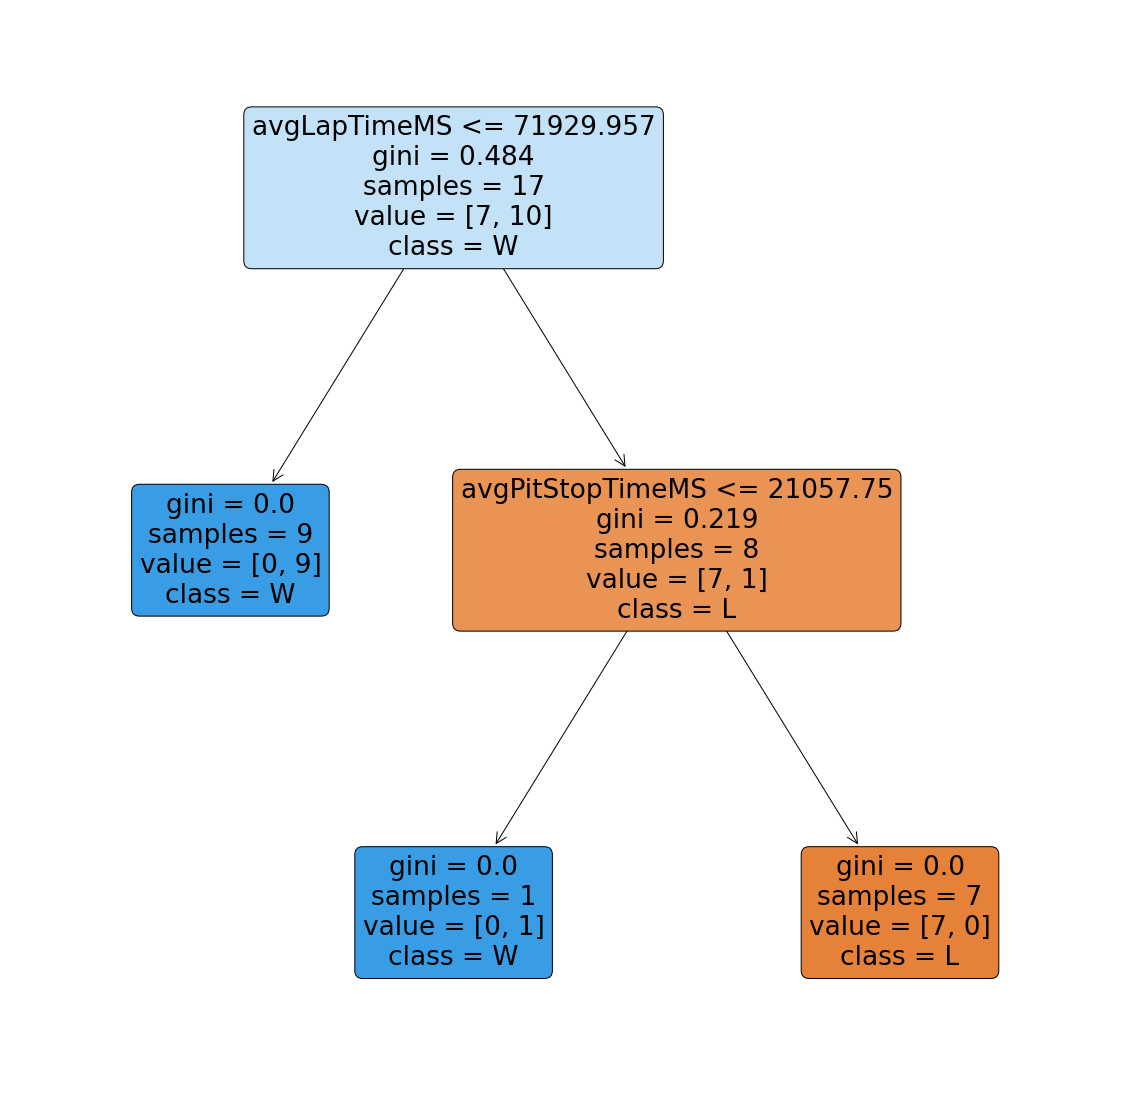

In [26]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = k, shuffle = True, random_state = 0)
i=0
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",model.score(x_test,y_test))
    print('Average K-Fold Score :' , np.mean(scores)) 
    #plt.figure()
    x = tree.plot_tree(model,rounded=True,filled=True,class_names=sorted,feature_names=features) 